In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vincenty import vincenty

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
#Import natural disaster data
raw = pd.read_csv('natural_disaster_human_mobility.csv')

In [3]:
#Switch latitude and longtitude columns, rename and reorder, dataframe
df = raw
df = df.rename(columns = {'disaster.event': 'event', 'user.anon': 'user', 'latitude': 'long', 'longitude.anon': 'lat'})
df = df[['event', 'user', 'lat', 'long', 'time']]
df['time'] = pd.DatetimeIndex(df['time'])


In [4]:
#Calculate event location by averaging the first lat long entry for each user
group = df.groupby(by = 'event').mean()
group

,user,lat,long
event,,,
01_Wipha,24368.338734,28.391620,139.668645
02_Halong,2482.137684,43.006657,127.762166
06_Kalmaegi,591.625357,5.342795,120.410101
08_Rammasun_Manila,17102.932522,9.572405,120.997554
12_Bohol,3805.313771,-2.370050,123.860556
13_Iquique,781.068314,-18.004903,-70.133271
14_Napa,888.637865,34.441945,-122.302310
21_Norfolk,4276.517602,69.428469,1.132364
22_Hamburg,1428.430413,63.611212,10.002712


In [5]:
#Export average coordinates to csv for tableau
group.to_csv('ave_coord.csv')

In [23]:
napa2 = df[(df['event'] == '14_Napa')]
napa2.shape
napa2.to_csv('napa2.csv')
napa2.hea

,event,user,lat,long,time
2579280,14_Napa,1,34.476407,-122.271651,2014-08-23 16:53:23
2579281,14_Napa,1,34.476850,-122.271929,2014-08-23 18:36:07
2579282,14_Napa,2,34.429233,-122.292902,2014-08-24 03:26:05
2579283,14_Napa,3,34.448051,-122.311231,2014-07-30 13:05:52
2579284,14_Napa,3,34.448052,-122.311114,2014-07-30 13:39:35
2579285,14_Napa,3,34.448061,-122.311166,2014-07-30 13:52:43
2579286,14_Napa,3,34.448056,-122.311181,2014-07-30 13:56:19
2579287,14_Napa,3,34.447890,-122.310961,2014-07-30 14:30:14
2579288,14_Napa,3,34.447836,-122.311191,2014-07-30 18:06:35
2579289,14_Napa,3,34.448093,-122.311134,2014-07-30 19:02:57


In [24]:
napa = df[(df['event'] == '14_Napa')]

In [25]:
#Generate distance column
napa['lat_1'] = napa['lat'].shift()
napa['long_1'] = napa['long'].shift()
napa['dist_mi'] = napa.apply(lambda row: vincenty((row['lat'], row['long']), (row['lat_1'], row['long_1'])), axis=1)
napa['dist_ft'] = napa['dist_mi']*5260

/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [26]:
napa['time_diff'] = napa['time'].diff()
napa['time_diff_hour'] = napa['time_diff']/np.timedelta64(1, 'h')
napa['time_diff_day'] = napa['time_diff']/np.timedelta64(1, 'D')

/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [27]:
napa['velocity_mph'] = napa['dist_mi']/napa['time_diff_hour'] 

/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
m = napa['time'].min()
m

Timestamp('2014-07-30 03:01:16')

In [12]:
napa.to_csv('napa.csv')

In [13]:
napa.iloc[0,:]

event                         14_Napa
user                                3
lat                           34.4481
long                         -122.311
time              2014-07-30 13:05:52
lat_1                             NaN
long_1                            NaN
dist_mi                           NaN
dist_ft                           NaN
time_diff                         NaT
time_diff_hour                    NaN
time_diff_day                     NaN
velocity_mph                      NaN
Name: 2579283, dtype: object

In [29]:
napa['date'] = napa['time'].dt.date
napa
#pd.to_datetime(napa['time'],format = '%m/%d/%Y')

/Users/mattcarney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,event,user,lat,long,time,lat_1,long_1,dist_mi,dist_ft,time_diff,time_diff_hour,time_diff_day,velocity_mph,date
2579280,14_Napa,1,34.476407,-122.271651,2014-08-23 16:53:23,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2014-08-23
2579281,14_Napa,1,34.476850,-122.271929,2014-08-23 18:36:07,34.476407,-122.271651,0.055382,291.30932,0 days 01:42:44,1.712222,0.071343,0.032345,2014-08-23
2579282,14_Napa,2,34.429233,-122.292902,2014-08-24 03:26:05,34.476850,-122.271929,5.622784,29575.84384,0 days 08:49:58,8.832778,0.368032,0.636582,2014-08-24
2579283,14_Napa,3,34.448051,-122.311231,2014-07-30 13:05:52,34.429233,-122.292902,2.682419,14109.52394,-25 days +09:39:47,-590.336944,-24.597373,-0.004544,2014-07-30
2579284,14_Napa,3,34.448052,-122.311114,2014-07-30 13:39:35,34.448051,-122.311231,0.010753,56.56078,0 days 00:33:43,0.561944,0.023414,0.019135,2014-07-30
2579285,14_Napa,3,34.448061,-122.311166,2014-07-30 13:52:43,34.448052,-122.311114,0.004882,25.67932,0 days 00:13:08,0.218889,0.009120,0.022304,2014-07-30
2579286,14_Napa,3,34.448056,-122.311181,2014-07-30 13:56:19,34.448061,-122.311166,0.001486,7.81636,0 days 00:03:36,0.060000,0.002500,0.024767,2014-07-30
2579287,14_Napa,3,34.447890,-122.310961,2014-07-30 14:30:14,34.448056,-122.311181,0.027347,143.84522,0 days 00:33:55,0.565278,0.023553,0.048378,2014-07-30
2579288,14_Napa,3,34.447836,-122.311191,2014-07-30 18:06:35,34.447890,-122.310961,0.021969,115.55694,0 days 03:36:21,3.605833,0.150243,0.006093,2014-07-30
2579289,14_Napa,3,34.448093,-122.311134,2014-07-30 19:02:57,34.447836,-122.311191,0.028986,152.46636,0 days 00:56:22,0.939444,0.039144,0.030854,2014-07-30


In [32]:
napa_group = napa.groupby(by = 'date').mean()
napa_group

,user,lat,long,lat_1,long_1,dist_mi,dist_ft,time_diff_hour,time_diff_day,velocity_mph
date,,,,,,,,,,
2014-07-30,824.750450,34.443703,-122.304345,34.442362,-122.303509,1.071967,5638.544591,-61.437436,-2.559893,1.604734
2014-07-31,908.339607,34.441810,-122.301823,34.441836,-122.301394,0.555668,2922.813819,-58.847101,-2.451963,1.107948
2014-08-01,873.465636,34.444151,-122.303227,34.443680,-122.303351,0.743947,3913.161911,-80.987721,-3.374488,1.660990
2014-08-02,901.144660,34.442128,-122.303153,34.442244,-122.303142,0.960555,5052.517288,-73.889059,-3.078711,1.500869
2014-08-03,807.402695,34.443532,-122.303605,34.443905,-122.303235,0.656283,3452.050808,-31.334980,-1.305624,1.500495
2014-08-04,864.852655,34.444408,-122.305311,34.444489,-122.305421,0.545808,2870.947755,-15.695508,-0.653979,1.065412
2014-08-05,862.764947,34.440970,-122.302830,34.441184,-122.303232,0.667300,3509.997319,-24.498910,-1.020788,1.489472
2014-08-06,888.158717,34.444428,-122.304272,34.444075,-122.304385,0.557472,2932.301055,-2.343527,-0.097647,0.745735
2014-08-07,786.499585,34.442443,-122.304268,34.442649,-122.304291,0.619013,3256.010584,-9.286736,-0.386947,1.083028


In [40]:
napa_group2 = napa.groupby(by = 'date').size()
napa_group2

date
2014-07-30    1110
2014-07-31    1169
2014-08-01    1164
2014-08-02    1030
2014-08-03    1336
2014-08-04    1337
2014-08-05    1221
2014-08-06    1216
2014-08-07    1205
2014-08-08    1292
2014-08-09    1089
2014-08-10    1055
2014-08-11    1251
2014-08-12    1198
2014-08-13    1158
2014-08-14    1083
2014-08-15    1087
2014-08-16    1037
2014-08-17    1019
2014-08-18    1025
2014-08-19    1011
2014-08-20    1259
2014-08-21    1132
2014-08-22     983
2014-08-23    1155
2014-08-24    2871
2014-08-25    1516
2014-08-26    1677
2014-08-27    1179
2014-08-28    1150
2014-08-29     993
2014-08-30      11
dtype: int64

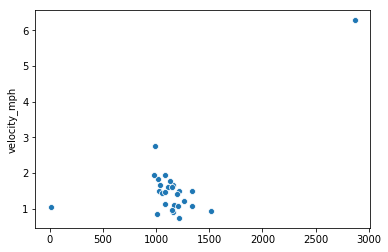

In [39]:
sns.scatterplot(x=napa_group2, y=napa_group['velocity_mph'])